<a href="https://colab.research.google.com/github/vjhawar12/IrisClassifier/blob/main/Iris_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
# Importing libraries for manipulating data

import pandas as pd
import numpy as np

In [76]:
# Loading dataset and printing out the first 10 lines

iris = pd.read_csv("iris.csv")
# print(iris.head(10))
print(iris[10:20])

    sepal.length  sepal.width  petal.length  petal.width variety
10           5.4          3.7           1.5          0.2  Setosa
11           4.8          3.4           1.6          0.2  Setosa
12           4.8          3.0           1.4          0.1  Setosa
13           4.3          3.0           1.1          0.1  Setosa
14           5.8          4.0           1.2          0.2  Setosa
15           5.7          4.4           1.5          0.4  Setosa
16           5.4          3.9           1.3          0.4  Setosa
17           5.1          3.5           1.4          0.3  Setosa
18           5.7          3.8           1.7          0.3  Setosa
19           5.1          3.8           1.5          0.3  Setosa


In [77]:
# Adding another row that reperesents Setosa (0) Versicolor (1) and Virginica (2)
def group(row):
  names = ["Setosa", "Versicolor", "Virginica"]
  return names.index(row.variety)

iris["number"] = iris.apply(group, axis=1)
print(iris[45:55])

    sepal.length  sepal.width  petal.length  petal.width     variety  number
45           4.8          3.0           1.4          0.3      Setosa       0
46           5.1          3.8           1.6          0.2      Setosa       0
47           4.6          3.2           1.4          0.2      Setosa       0
48           5.3          3.7           1.5          0.2      Setosa       0
49           5.0          3.3           1.4          0.2      Setosa       0
50           7.0          3.2           4.7          1.4  Versicolor       1
51           6.4          3.2           4.5          1.5  Versicolor       1
52           6.9          3.1           4.9          1.5  Versicolor       1
53           5.5          2.3           4.0          1.3  Versicolor       1
54           6.5          2.8           4.6          1.5  Versicolor       1


In [78]:
# This lets you view the number of flowers per variety

iris.groupby('variety').size()

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

In [79]:
# This prints out some basic statistical data about the flowers

iris.describe()

,sepal.length,sepal.width,petal.length,petal.width,number
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [80]:
# To graph this we will use matplotlib.pyplot

import matplotlib.pyplot as plt

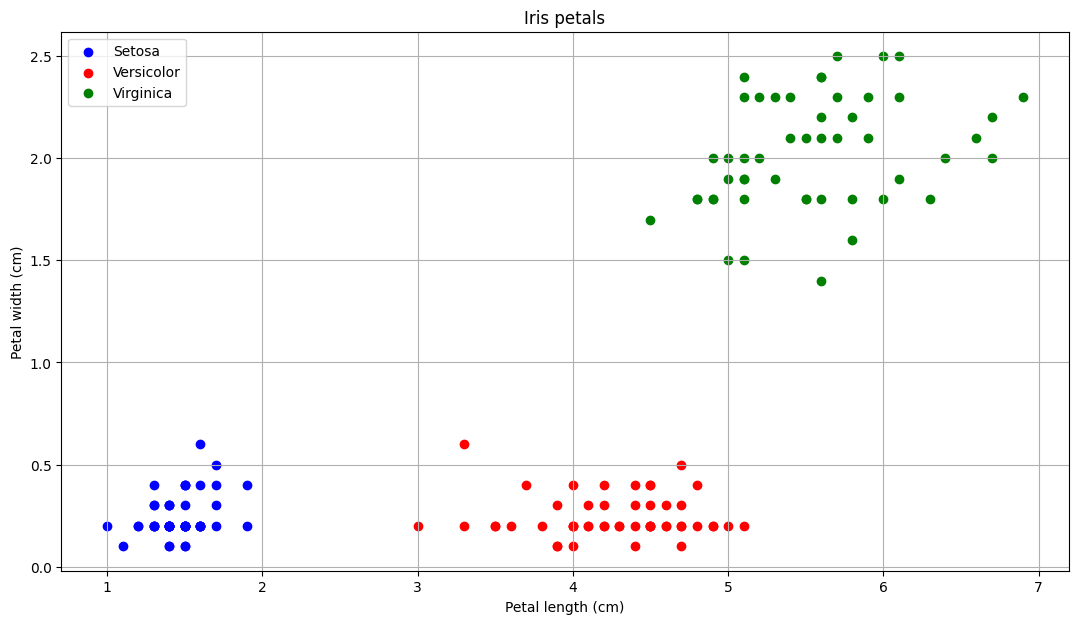

In [81]:
# List of iris' of each variety
setosa = iris[iris.variety == "Setosa"]
versicolor = iris[iris.variety == "Versicolor"]
virginica = iris[iris.variety == "Virginica"]

# Creating 2 subplots and settings size of graph
fig, ax = plt.subplots()
fig.set_size_inches(13, 7)

# Plotting the data on the graph
ax.scatter(setosa['petal.length'], setosa['petal.width'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal.length'], setosa['petal.width'], label="Versicolor", facecolor="red")
ax.scatter(virginica['petal.length'], virginica['petal.width'], label="Virginica", facecolor="green")

# Setting the label names
ax.set_xlabel("Petal length (cm)")
ax.set_ylabel("Petal width (cm)")
ax.grid() # makes grid lines
ax.set_title("Iris petals")
ax.legend() # creates a legend for the graph

In [82]:
# Using a classification algorithm to group iris petals

from sklearn.model_selection import train_test_split

# Drop the labels since we only need the numeric values
X = iris.drop(["variety", "number"], axis=1)

# converting to numpy array
X = X.to_numpy()[:, (2,3)] # all the rows + third and fourth column

y = iris["number"]

# Using the 80:20 ratio to split the data between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  # random_state ensures the data is split the same way#

In [83]:
# Importing LogisticRegression to train the data

from sklearn.linear_model import LogisticRegression

# creating an instace of LogisticRegression and passing in the training data
reg = LogisticRegression()
reg.fit(X_train, y_train)

train_prediction = reg.predict(X_train)
print(train_prediction) # printing the training data prediction

[1 2 1 2 2 0 1 0 1 2 2 0 2 2 1 2 0 0 0 1 0 0 2 2 2 2 2 1 2 1 0 2 2 0 0 2 0
 2 2 1 1 2 2 0 1 1 2 1 2 1 0 0 0 2 0 2 2 2 0 0 1 0 2 1 2 2 1 2 2 1 0 1 0 1
 1 0 1 0 0 2 2 2 0 0 2 0 2 0 2 1 0 2 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 2 0 0
 2 1 2 1 2 2 1 2 0]


In [84]:
# predicting the test data

reg.fit(X_test, y_test)
test_prediction = reg.predict(X_test)
print(test_prediction)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 1]


In [ ]:
# measuring the performance